In [2]:
import openslide 
from openslide import OpenSlide

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import cv2

In [5]:
import os
from os.path import expanduser
home = expanduser("~")

In [6]:
# data_path = 'CMU-1-Small-Region.svs'
data_path = os.path.join(home, 'Insync/jongtaeklee@gmail.com/Google Drive/Pathology', 'S20_00451.svs')
wsi = OpenSlide(data_path)

In [7]:
width, height = wsi.level_dimensions[0]

In [8]:
width, height

(93461, 88492)

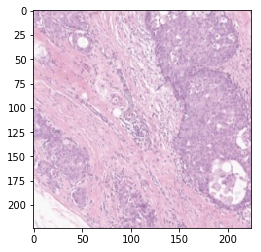

In [45]:
patch = {'width': 224, 'height': 224}
pos_x, pos_y = [44000,44000]
level = wsi.read_region((pos_x,pos_y), 2, (patch['width'], patch['height']))
plt.figure()#figsize=[10,10])
plt.imshow(level.convert('RGB'))

In [64]:
type(level[0])

TypeError: 'Image' object does not support indexing

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3


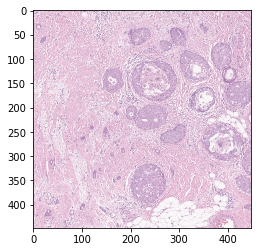

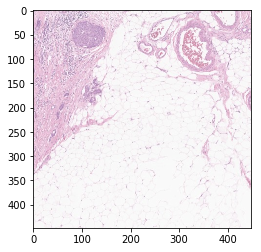

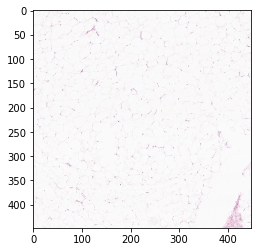

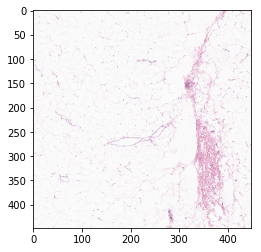

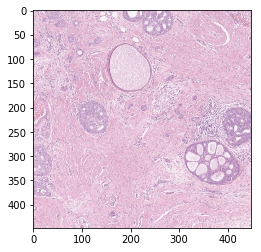

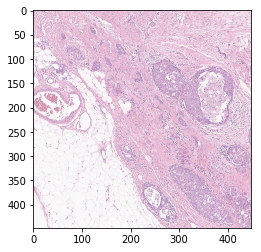

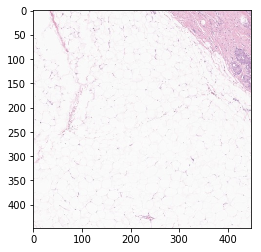

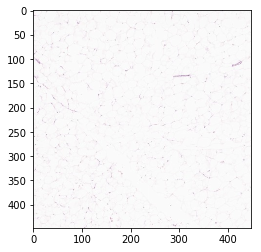

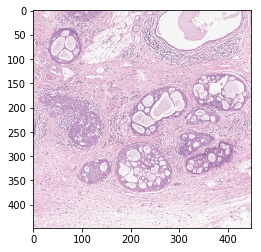

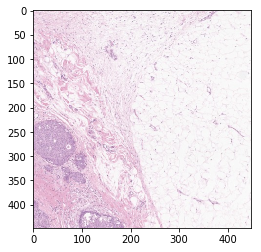

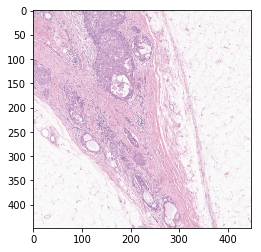

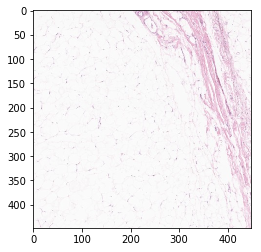

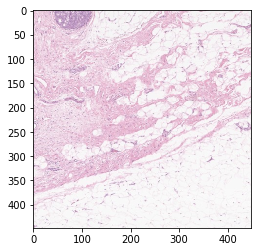

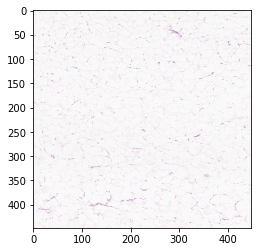

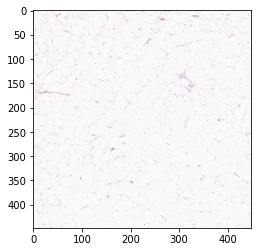

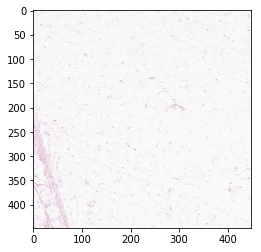

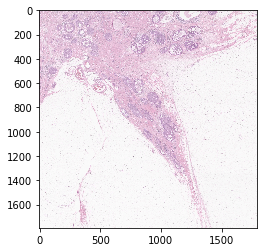

In [95]:
patch_size = 448
patch = {'width': patch_size, 'height': patch_size}
pos_x_0 = 30000
pos_y_0 = 30000
interval = patch_size * 16
grids = 4
image = np.zeros((patch_size*grids, patch_size*grids, 3))
count_x, count_y = [0, 0]

for pos_x in range(pos_x_0, pos_x_0 + interval*(grids-1) + 1, interval):    
    for pos_y in range(pos_y_0, pos_y_0 + interval*(grids-1) + 1, interval):
        print(count_x, count_y)
        level = wsi.read_region((pos_x,pos_y), 2, (patch['width'], patch['height']))
        plt.figure()#figsize=[10,10])
        plt.imshow(level.convert('RGB'))
        image[count_y*patch_size:count_y*patch_size+patch_size, count_x*patch_size:count_x*patch_size+patch_size, :] = level.convert('RGB')
        filename = 'temp_{}_{}.png'.format(count_x, count_y)
        img = np.array(level.convert('RGB'))[:, :, ::-1]
        img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(filename, img)
        
        count_y += 1
        count_y %= grids
    count_x += 1

plt.figure()        
plt.imshow(image.astype(int))
        

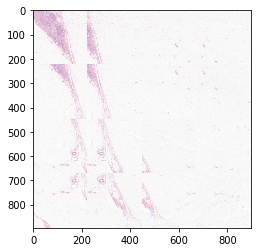

In [85]:
plt.imshow(image.astype(int))